## Exploratory Data Analysis for Movie data

This part mainly focuses on exploratory data analysis such as the relationship between predictors and response, the distribution of predictors and correlation.

In [1]:
# Make the chunk output all results not only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from datetime import datetime
#import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [3]:
# Load data
train=pd.read_csv("new_train.csv")
test=pd.read_csv("new_test.csv")

# Look at the data
train.head(10)

# Shape
train.shape
test.shape

,id,budget,original_language,original_title,overview,popularity,runtime,status,tagline,title,Keywords,cast,crew,revenue,collection,has_collection,log_budget,genres_name,n_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,has_homepage,log_popularity,company,n_company,all_production_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,country,n_country,all_production_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,release_time,year,month,DOW,season,Weekend,language,n_lan,all_spoken_languages,lan_English,lan_Français,lan_Español,lan_Deutsch,lan_Pусский,lan_Italiano,lan_日本語,lan_普通话,word,word_div,Crew,n_crew,initial_crew,crew_top,crew_top_ratio,Cast,n_cast,initial_cast,cast_top,cast_top_ratio
0,1,14000000,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1,16.454568,['Comedy'],1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,2.024905,"['Paramount Pictures', 'United Artists', 'Metr...",3,Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,['United States of America'],1,United States of America,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-02-20,2015,2,4,4,0,['English'],1,English,1,0,0,0,0,0,0,0,"['time travel', 'sequel', 'hot tub', 'duringcr...",4,"['Kelly Cantley', 'Steve Pink', 'Josh Heald', ...",72,"['Kelly Cantley', 'Steve Pink', 'Josh Heald', ...",1,0.013889,"['Rob Corddry', 'Craig Robinson', 'Clark Duke'...",24,"['Rob Corddry', 'Craig Robinson', 'Clark Duke'...",3,0.125000
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1,17.504390,"['Comedy', 'Drama', 'Family', 'Romance']",4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,2.224504,['Walt Disney Pictures'],1,Walt Disney Pictures,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,['United States of America'],1,United States of America,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004-08-06,2004,8,4,2,0,['English'],1,English,1,0,0,0,0,0,0,0,"['coronation', 'duty', 'marriage', 'falling in...",4,"['Garry Marshall', 'Charles Minsky', 'John Deb...",9,"['Garry Marshall', 'Charles Minsky', 'John Deb...",2,0.222222,"['Anne Hathaway', 'Julie Andrews', 'H√©ctor El...",20,"['Anne Hathaway', 'Julie Andrews', 'H√©ct

(3000, 103)

(4398, 102)

### *Revenue*

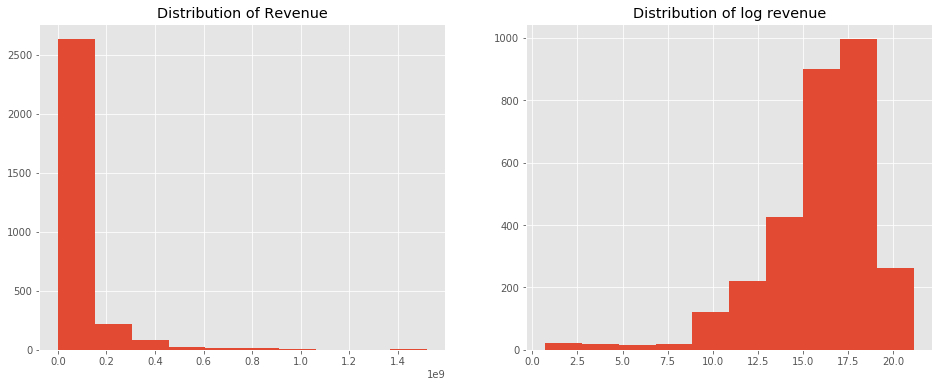

In [4]:
# Summary Statistics
train['revenue'].describe()

# Histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of Revenue');

# Highly skewed --> convert to log(revenue)
train['log_revenue']=np.log1p(train['revenue'])
plt.subplot(1, 2, 2)
plt.hist(train['log_revenue']);
plt.title('Distribution of log revenue');

 From last part, we know that we need to do exploratory data analysis for `belongs_to_collection`, `budget`, `genres`, `homepage`, `original_language`, `popularity`, `production_companies`, `production_countries`, `release_date`, `runtime`, `spoken_languages`, `status`, `Keywords`, `cast` and `crew`. Next, let's look at them one by one.

### *has_collection*

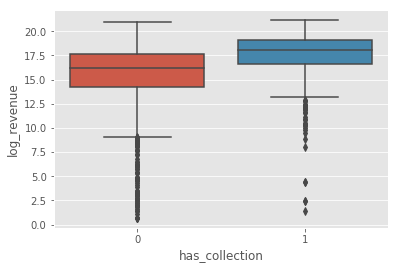

In [5]:
# Boxplot for log_revenue and whether a movie has a collection
sns.boxplot(x='has_collection', y='log_revenue', data=train);

#### I found that movies with collection tend to have higher revenue. This is maybe because films with collection usually have more fans and therefore more revenue.

### *budget*

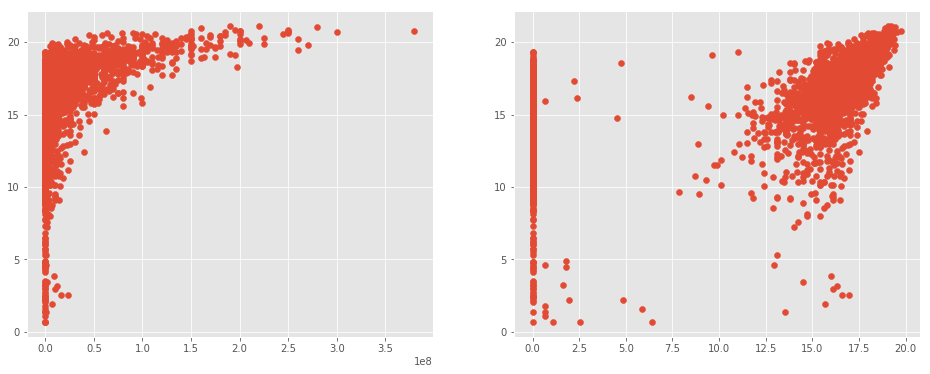

In [6]:
# Scatter plot of budget and log revenue
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['log_revenue'])

plt.subplot(1, 2, 2)
plt.scatter(train['log_budget'], train['log_revenue'])

#### I found that budget and log_revenue has a positive relationship.

### *genres*

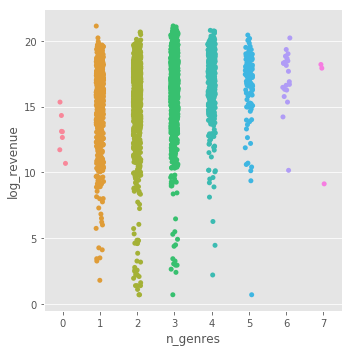

In [7]:
# Scatter plot
sns.catplot(x='n_genres', y='log_revenue', data=train)

#### Moives with 3-4 genres tend to have higher revenue.

Text(0.5,0.98,'Violinplot of revenue vs genres')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



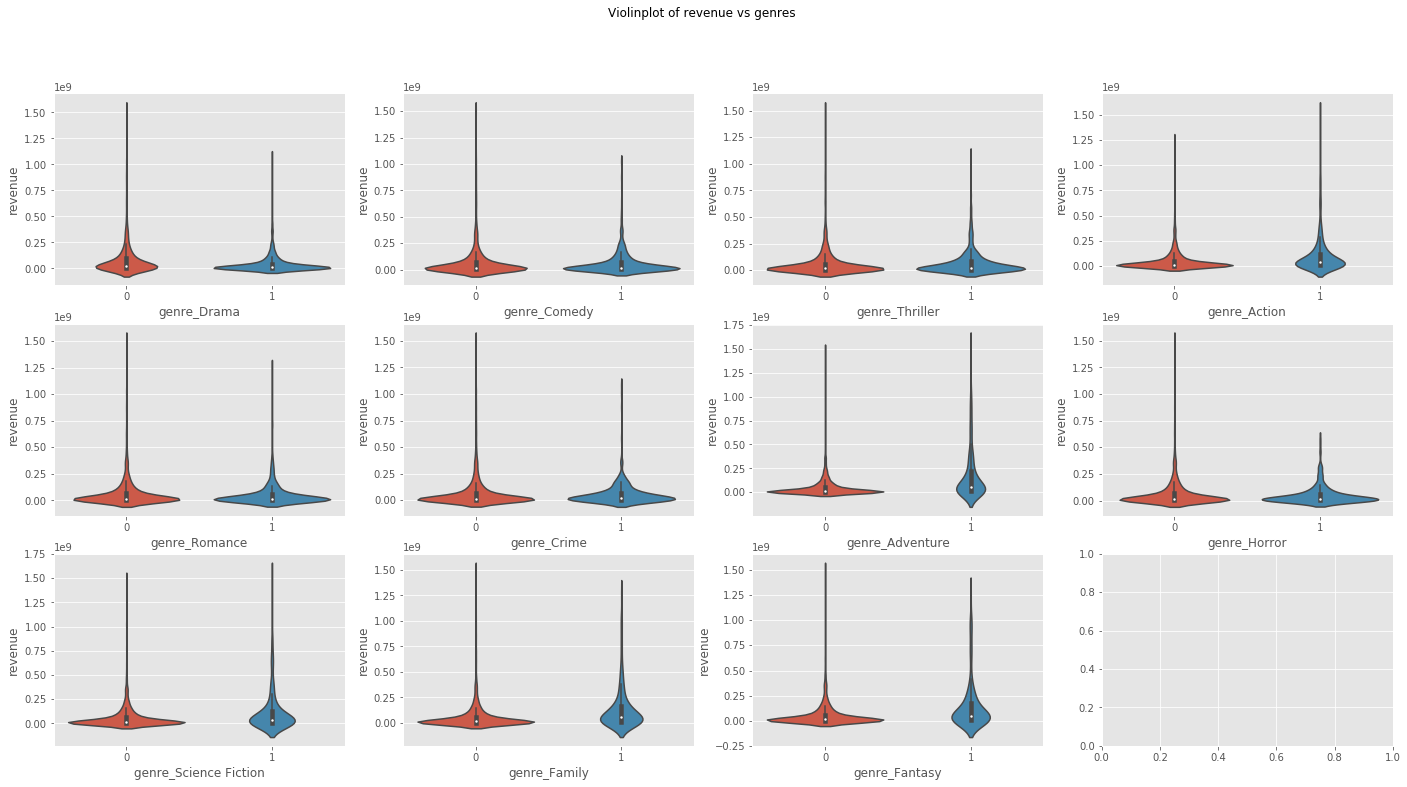

In [8]:
f, axes = plt.subplots(3, 4, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in train.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 4][i % 4]);

#### Some genres have higher revenue, some are not.

### *has_homepage*

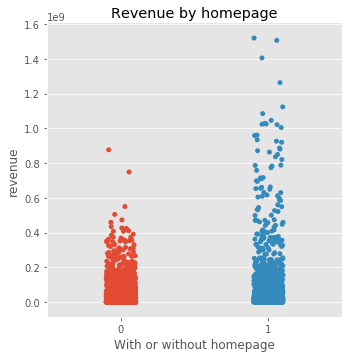

In [9]:
# Scatter plot
ax = sns.catplot(x='has_homepage', y='revenue', data=train);
ax.set(xlabel='With or without homepage', ylabel='revenue', title='Revenue by homepage')
plt.show()

#### It seems that the movie with homepage tends to have higher revenue.

### *original_language*

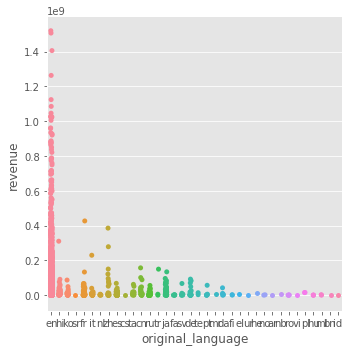

In [10]:
# Scatter plot
sns.catplot(x='original_language', y='revenue', data=train)

#### It seems that the movie with English tends to have higher revenue. Since we have a column represent eng_movie, we can use that predictor rather than this one. 

### *popularity*

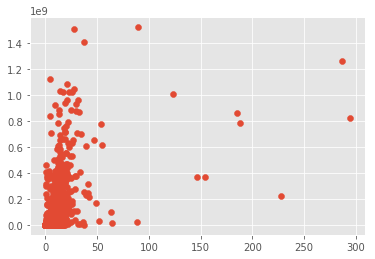

In [11]:
# Scatter plot of revenue and popularity
plt.scatter(train['popularity'], train['revenue'])

#### We found that popularity and revenue have a positive relationship.

### *production_companies*

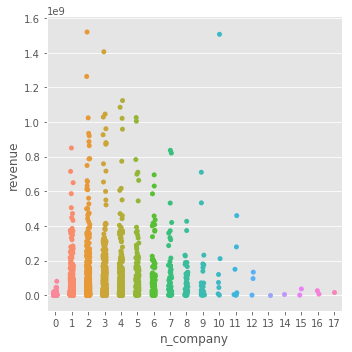

In [12]:
sns.catplot(x='n_company', y='revenue', data=train)

Text(0.5,0.98,'Violinplot of revenue vs company')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



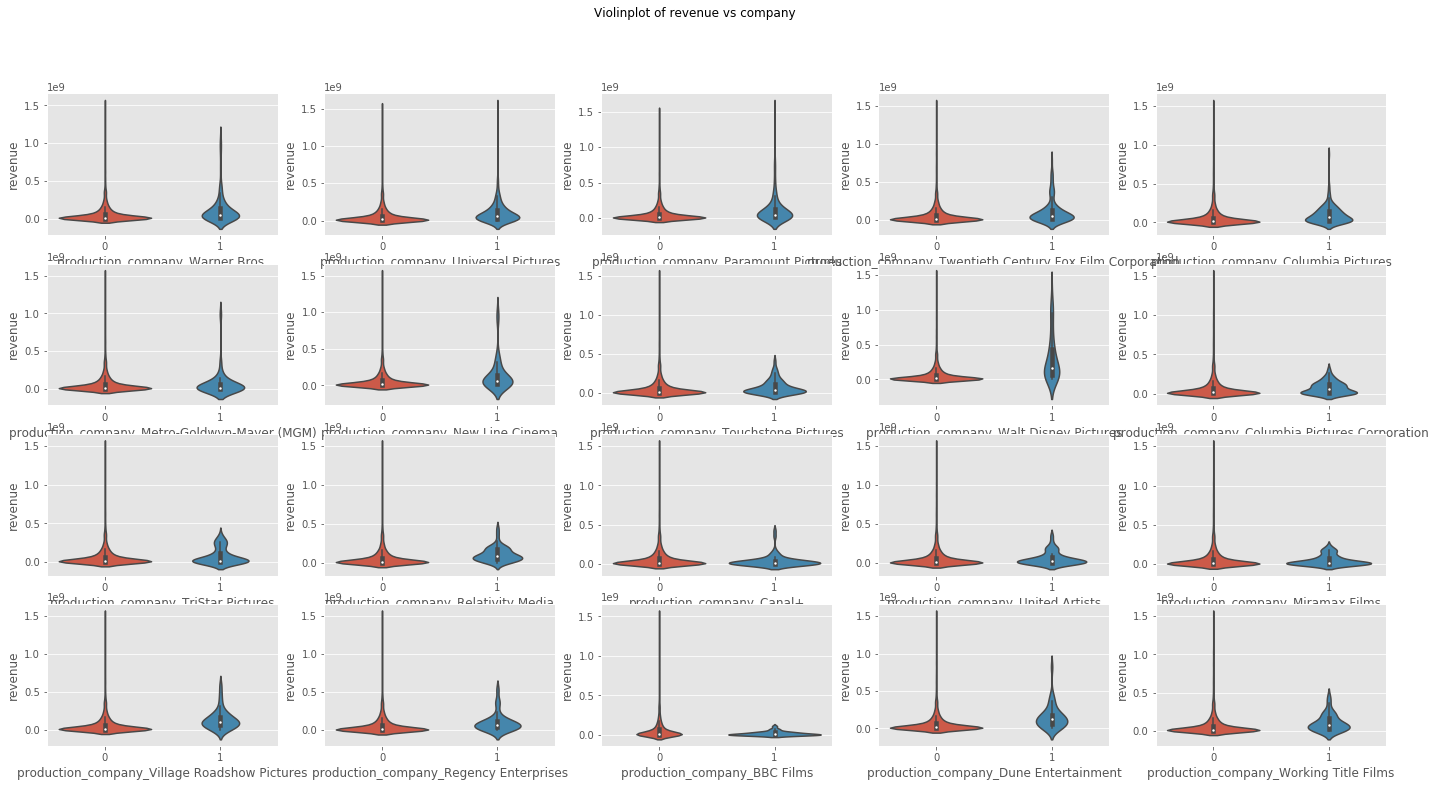

In [13]:
f, axes = plt.subplots(4, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs company')
for i, e in enumerate([col for col in train.columns if 'company_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

#### Some companies tend to have less revenue, some tend to have higher.

### *production_countries*

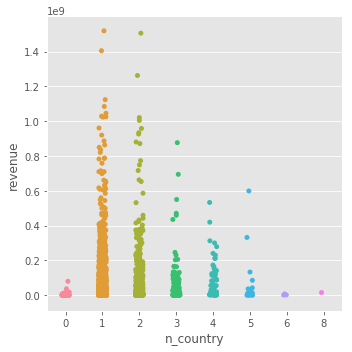

In [14]:
sns.catplot(x='n_country', y='revenue', data=train)

#### This predictor is not very useful since most moives are produced by 1-2 countries.

Text(0.5,0.98,'Violinplot of revenue vs country')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



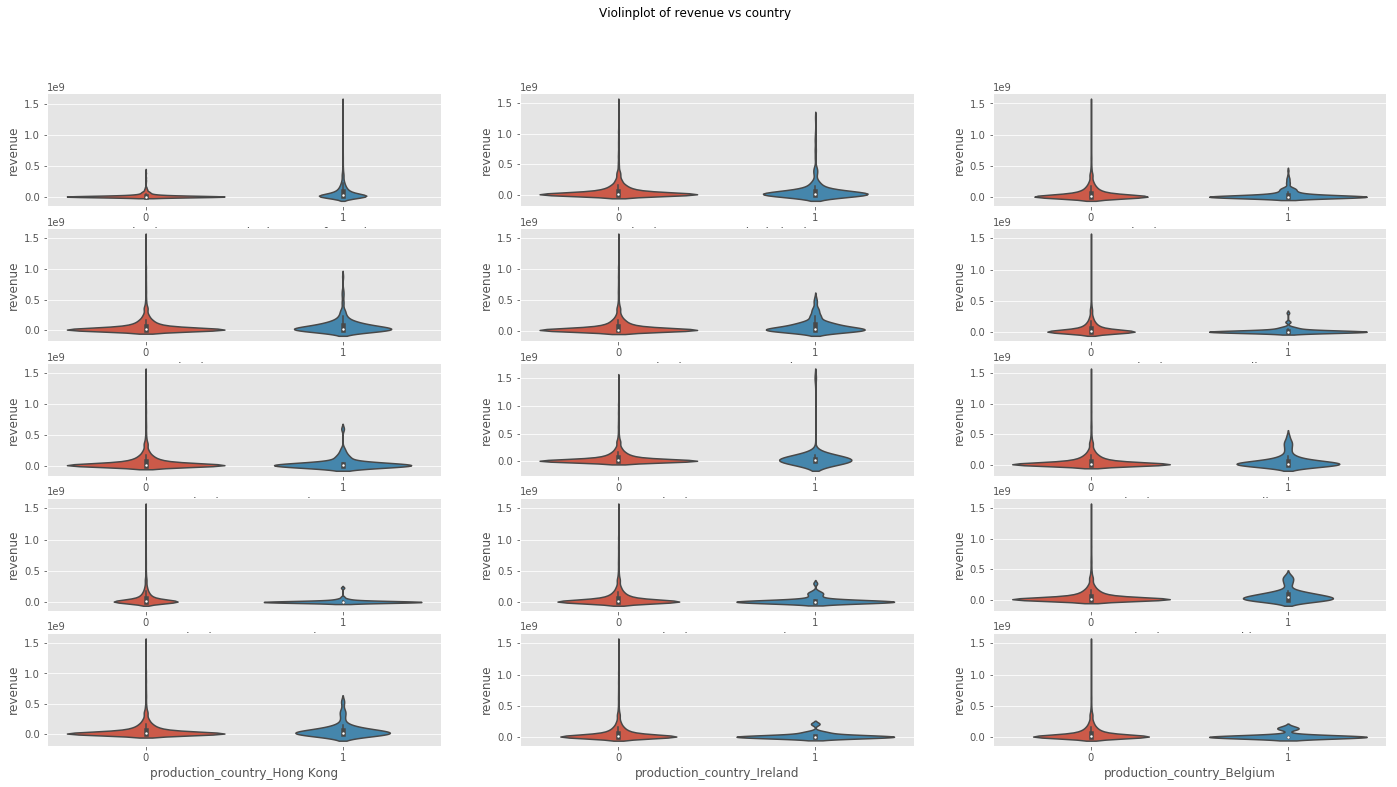

In [15]:
f, axes = plt.subplots(5, 3, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs country')
for i, e in enumerate([col for col in train.columns if 'country_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 3][i % 3]);

#### There are only some countries have a very high revenue than others.

### *release_date*

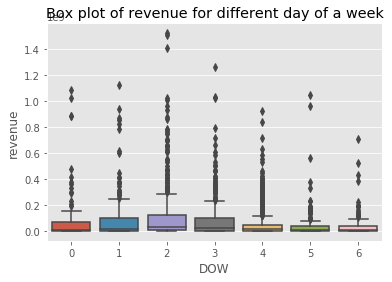

In [16]:
# Box plot for revenue and DOW
sns.boxplot(x='DOW', y='revenue', data=train);
plt.title('Box plot of revenue for different day of a week');

#### Wednesday--2 and Thursday--3 tend to have higher revenue.

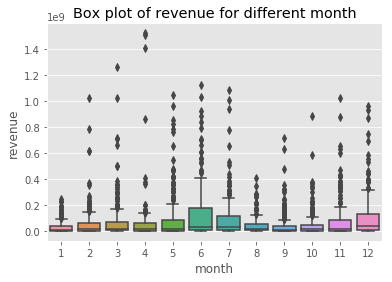

In [17]:
# Box plot for revenue and month
sns.boxplot(x='month', y='revenue', data=train);
plt.title('Box plot of revenue for different month');

#### Month 2-7 and 11-12 tend to have higher revenue.

In [18]:
# Line plot for average revenue and year
d1 = train['year'].value_counts().sort_index()
d2 = train.groupby(['year'])['revenue'].mean()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

#### It seems that 1970-1980 has a peak and 2010 to now has a peak.

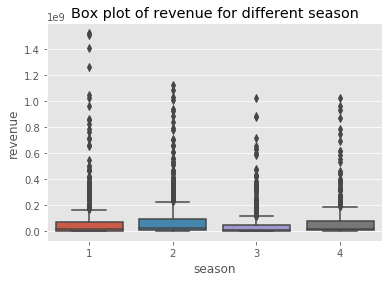

In [19]:
# Box plot for revenue and season
sns.boxplot(x='season', y='revenue', data=train);
plt.title('Box plot of revenue for different season');

#### Spring tends to have higher revenue.

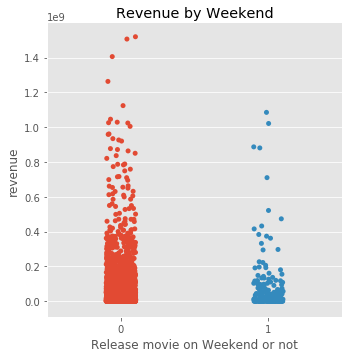

In [20]:
# Scatter plot of weekend and revenue
ax = sns.catplot(x='Weekend', y='revenue', data=train);
ax.set(xlabel='Release movie on Weekend or not', ylabel='revenue', title='Revenue by Weekend')
plt.show()

#### It seems that movies released on weekday tend to have higher revenue.

### *runtime*

(array([ 14.,   1.,   0.,   0.,   2.,   0.,   1.,   6.,  33., 132., 433.,
        711., 523., 407., 269., 184., 110.,  53.,  45.,  27.,  16.,  13.,
         10.,   2.,   1.,   4.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.  ,   8.45,  16.9 ,  25.35,  33.8 ,  42.25,  50.7 ,  59.15,
         67.6 ,  76.05,  84.5 ,  92.95, 101.4 , 109.85, 118.3 , 126.75,
        135.2 , 143.65, 152.1 , 160.55, 169.  , 177.45, 185.9 , 194.35,
        202.8 , 211.25, 219.7 , 228.15, 236.6 , 245.05, 253.5 , 261.95,
        270.4 , 278.85, 287.3 , 295.75, 304.2 , 312.65, 321.1 , 329.55,
        338.  ]),
 <a list of 40 Patch objects>)

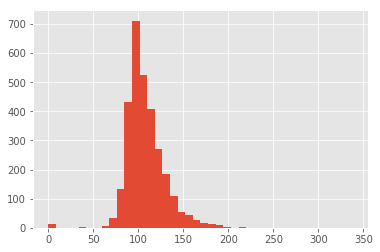

In [21]:
# Distribution of runtime
plt.hist(train['runtime'], bins=40)

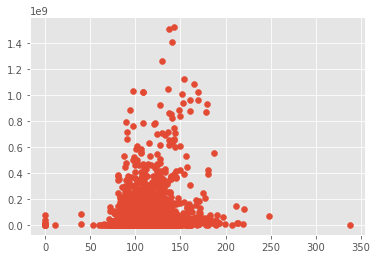

In [22]:
# Scatter plot of revenue and runtime
plt.scatter(train['runtime'], train['revenue'])

#### It seems that runtime and revenue does not have a clear relationship, since most movies are 100-120 mins and the highest revenue movies are also in that range.

### *spoken_languages*

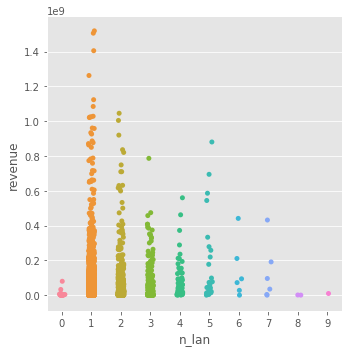

In [23]:
sns.catplot(x='n_lan', y='revenue', data=train)

#### It seems that movies having 1-5 spoken languages tend to have higher revenue.

Text(0.5,0.98,'Violinplot of revenue vs language')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



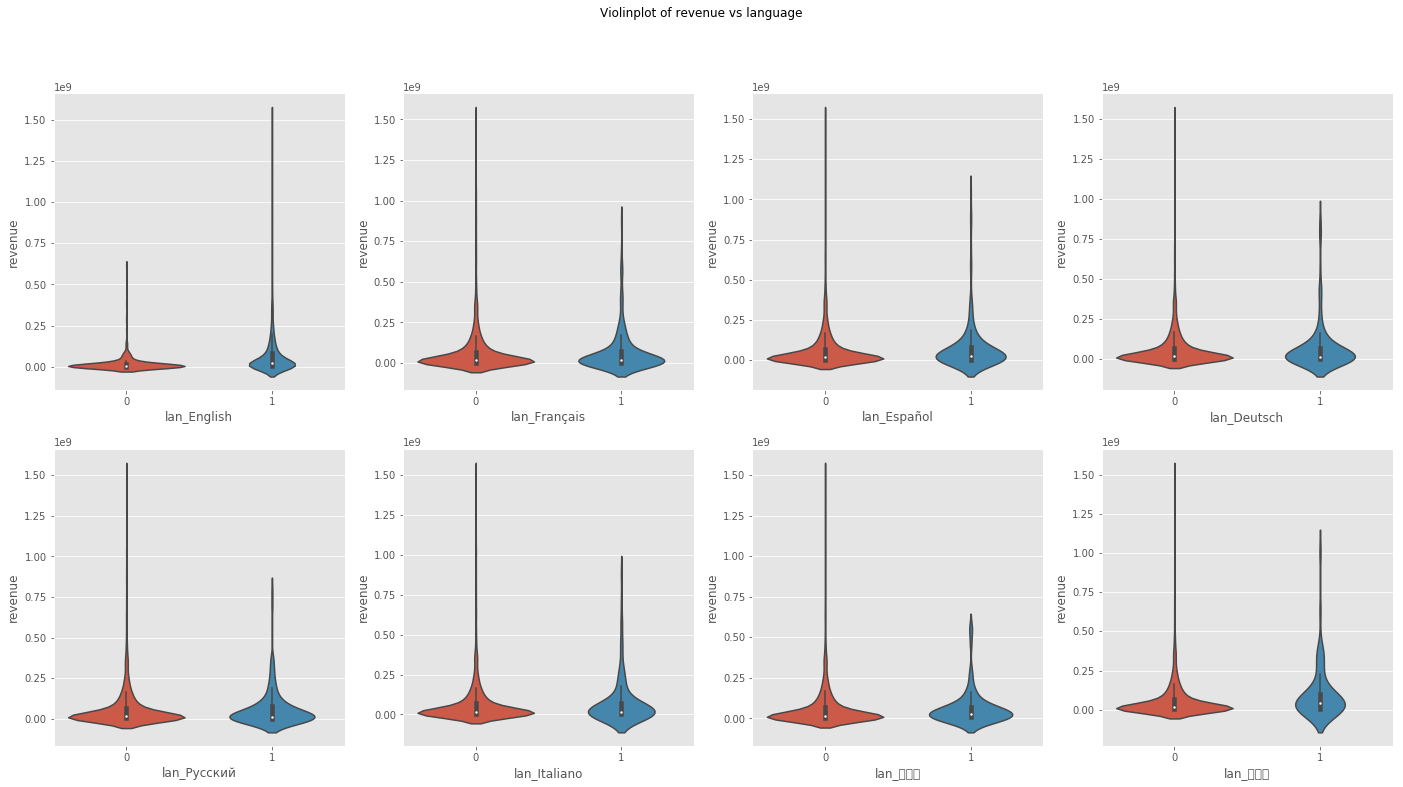

In [24]:
f, axes = plt.subplots(2, 4, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs language')
for i, e in enumerate([col for col in train.columns if 'lan_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 4][i % 4]);

### *status*

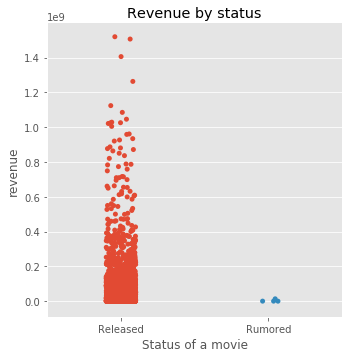

In [25]:
# Scatter plot
ax = sns.catplot(x='status', y='revenue', data=train);
ax.set(xlabel='Status of a movie', ylabel='revenue', title='Revenue by status')
plt.show()

#### Obviously, released movie tends to have higher revenue. However, since almost all the movies are released, this variable is not useful.

### *Keywords*

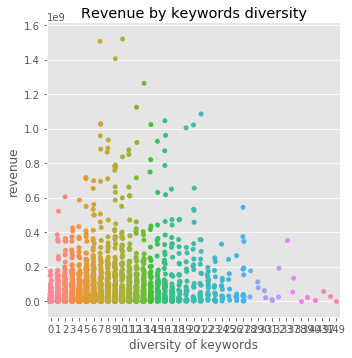

In [26]:
# Scatter plot
ax = sns.catplot(x='word_div', y='revenue', data=train);
ax.set(xlabel='diversity of keywords', ylabel='revenue', title='Revenue by keywords diversity')
plt.show()

#### It seems that word_div is not very useful for predicting revenue.

### *Crew*

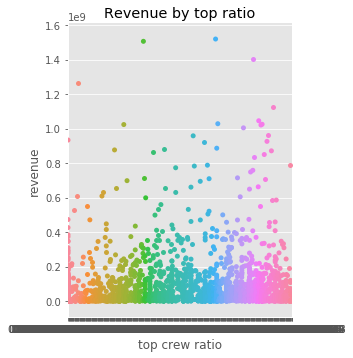

In [27]:
# Scatter plot
ax = sns.catplot(x='crew_top_ratio', y='revenue', data=train);
ax.set(xlabel='top crew ratio', ylabel='revenue', title='Revenue by top ratio')
plt.show()

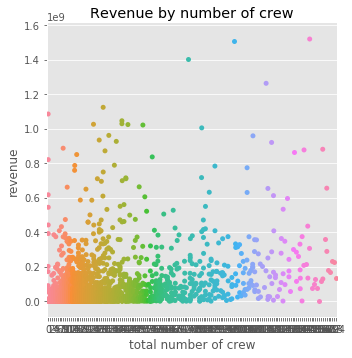

In [28]:
# Scatter plot
ax = sns.catplot(x='n_crew', y='revenue', data=train);
ax.set(xlabel='total number of crew', ylabel='revenue', title='Revenue by number of crew')
plt.show()

#### It seems that this variable is not very useful.

### *Cast*

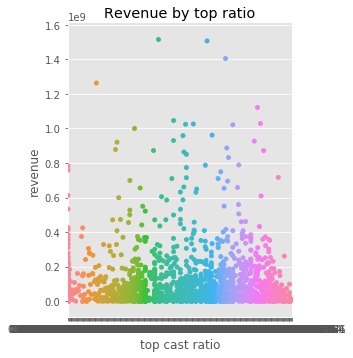

In [29]:
# Scatter plot
ax = sns.catplot(x='cast_top_ratio', y='revenue', data=train);
ax.set(xlabel='top cast ratio', ylabel='revenue', title='Revenue by top ratio')
plt.show()

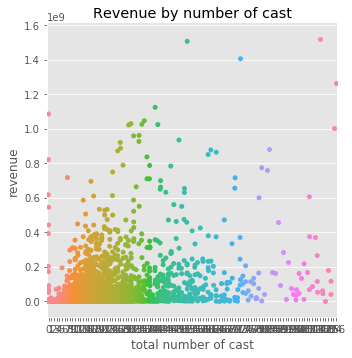

In [30]:
# Scatter plot
ax = sns.catplot(x='n_cast', y='revenue', data=train);
ax.set(xlabel='total number of cast', ylabel='revenue', title='Revenue by number of cast')
plt.show()

#### It seems that this variable is not very useful.

### *Correlation*

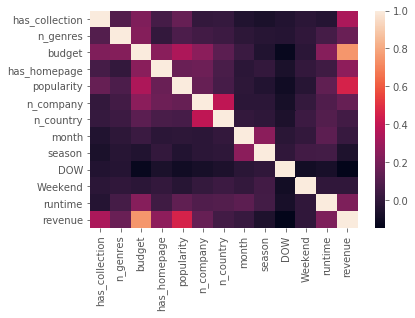

In [31]:
# Plot correlation
df=train[['has_collection', 'n_genres', 'budget', 'has_homepage', 'popularity', 'n_company', 
          'n_country', 'month', 'season', 'DOW', 'Weekend', 'runtime', 'revenue']]
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [32]:
# Write out output
train.to_csv("new_train_2.csv", index=False)
test.to_csv("new_test_2.csv", index=False)